# Starbucks Menu Nutrition

In [45]:
#load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [46]:
#load data
drinks= pd.read_csv('data/starbucks_drinkMenu_expanded.csv')

In [47]:
#check data frame contents
drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [48]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [49]:
#check data types
drinks.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [50]:
#get column names
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [51]:
#check values of Caffeine to understand why it is type object
drinks['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [52]:
#replace all non-numeric values of Caffeine with nan and then set all values to numeric type
drinks['Caffeine (mg)'][drinks['Caffeine (mg)'].str.match(r'[^0-9]')==True] = np.nan
drinks['Caffeine (mg)'] = pd.to_numeric(drinks['Caffeine (mg)'])

<ipython-input-52-a5f8d944762b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drinks['Caffeine (mg)'][drinks['Caffeine (mg)'].str.match(r'[^0-9]')==True] = np.nan


In [53]:
#check unique values again to verify our result
drinks['Caffeine (mg)'].unique()

array([175., 260., 330., 410.,  75., 150.,  85.,  95., 180., 225., 300.,
        10.,  20.,  25.,  30.,   0.,  nan,  50.,  70., 120.,  55.,  80.,
       110., 165., 235.,  90., 125., 170.,  15., 130., 140., 100., 145.,
        65., 105.])

In [54]:
#check Calcium values to determine why it is of type object
drinks[' Calcium (% DV) '].unique()

array(['0%', '2%', '20%', '30%', '40%', '50%', '15%', '25%', '35%', '45%',
       '10%', '60%', '6%', '8%'], dtype=object)

In [55]:
#replace all '%' in relevant columns with white space and then convert to numeric
per_cols = ['Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ']
drinks[per_cols] = drinks[per_cols].apply(lambda col: col.str.strip('%')).apply(lambda col: pd.to_numeric(col))

In [56]:
drinks[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [57]:
drinks[drinks[' Total Fat (g)']=='3 2']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10.0,0.0


In [58]:
drinks[' Total Fat (g)'] = pd.to_numeric(drinks[' Total Fat (g)'].str.replace(' ',''))

In [59]:
#check all data types again
drinks.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)               int64
Vitamin C (% DV)               int64
 Calcium (% DV)                int64
Iron (% DV)                  float64
Caffeine (mg)                float64
dtype: object

In [60]:
#check distinct beverage categories
drinks['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [61]:
#check distinct beverage preps
drinks['Beverage_prep'].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [62]:
#check unique beverage names
drinks['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [63]:
#filter for only certain drink preps to create a better data set for drawing comparisons
drink_prep = ['Short','Tall','Grande','Venti','Short Nonfat Milk','Tall Nonfat Milk','Grande Nonfat Milk','Venti Nonfat Milk']
drinks_filtered_preps = drinks[drinks['Beverage_prep'].isin(drink_prep)]

In [64]:
#create column for nonfat milk
drinks_filtered_preps['nonfat_milk'] = drinks_filtered_preps['Beverage_prep'].isin(['Short Nonfat Milk','Tall Nonfat Milk','Grande Nonfat Milk','Venti Nonfat Milk'])

<ipython-input-64-e362b884935d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drinks_filtered_preps['nonfat_milk'] = drinks_filtered_preps['Beverage_prep'].isin(['Short Nonfat Milk','Tall Nonfat Milk','Grande Nonfat Milk','Venti Nonfat Milk'])


In [65]:
drinks_filtered_preps.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),nonfat_milk
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0,False
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0,False
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0,False
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0,False
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0,True


In [66]:
#oz per Beverage_prep size
oz_size = {'Short': 8,'Tall': 12,'Grande': 16,'Venti': 20,'Short Nonfat Milk':8,'Tall Nonfat Milk':12,'Grande Nonfat Milk':16,'Venti Nonfat Milk':20}

In [67]:
drinks_filtered_preps['size_oz']=drinks_filtered_preps['Beverage_prep'].apply(lambda x: oz_size[x])

<ipython-input-67-b64eb47eb383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drinks_filtered_preps['size_oz']=drinks_filtered_preps['Beverage_prep'].apply(lambda x: oz_size[x])


In [68]:
drinks_filtered_preps.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),nonfat_milk,size_oz
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0,False,8
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0,False,12
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0,False,16
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0,False,20
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0,True,8


In [69]:
normalized_nutrition = drinks_filtered_preps.select_dtypes(include=['int64','float64']).divide(drinks_filtered_preps.size_oz,axis='rows').drop(columns = ['size_oz'])
normalized_nutrition.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,0.375000,0.012500,0.0000,0.0,0.000,0.625000,0.00,0.0,0.000,0.037500,0.00,0.0,0.0,0.0,21.875000
1,0.333333,0.008333,0.0000,0.0,0.000,0.833333,0.00,0.0,0.000,0.041667,0.00,0.0,0.0,0.0,21.666667
2,0.312500,0.006250,0.0000,0.0,0.000,0.625000,0.00,0.0,0.000,0.062500,0.00,0.0,0.0,0.0,20.625000
3,0.250000,0.005000,0.0000,0.0,0.000,0.500000,0.00,0.0,0.000,0.050000,0.00,0.0,0.1,0.0,20.500000
4,8.750000,0.012500,0.0125,0.0,0.625,9.375000,1.25,0.0,1.125,0.750000,1.25,0.0,2.5,0.0,9.375000


In [70]:
norm_cols = [('norm_' + col).replace(' ','') for col in normalized_nutrition.columns.tolist()]

In [71]:
normalized_nutrition.columns = norm_cols
normalized_nutrition.head()

,norm_Calories,norm_TotalFat(g),norm_TransFat(g),norm_SaturatedFat(g),norm_Sodium(mg),norm_TotalCarbohydrates(g),norm_Cholesterol(mg),norm_DietaryFibre(g),norm_Sugars(g),norm_Protein(g),norm_VitaminA(%DV),norm_VitaminC(%DV),norm_Calcium(%DV),norm_Iron(%DV),norm_Caffeine(mg)
0,0.375000,0.012500,0.0000,0.0,0.000,0.625000,0.00,0.0,0.000,0.037500,0.00,0.0,0.0,0.0,21.875000
1,0.333333,0.008333,0.0000,0.0,0.000,0.833333,0.00,0.0,0.000,0.041667,0.00,0.0,0.0,0.0,21.666667
2,0.312500,0.006250,0.0000,0.0,0.000,0.625000,0.00,0.0,0.000,0.062500,0.00,0.0,0.0,0.0,20.625000
3,0.250000,0.005000,0.0000,0.0,0.000,0.500000,0.00,0.0,0.000,0.050000,0.00,0.0,0.1,0.0,20.500000
4,8.750000,0.012500,0.0125,0.0,0.625,9.375000,1.25,0.0,1.125,0.750000,1.25,0.0,2.5,0.0,9.375000


In [72]:
drinks_norm = pd.concat([drinks_filtered_preps,normalized_nutrition],axis=1)
drinks_norm.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),...,norm_TotalCarbohydrates(g),norm_Cholesterol(mg),norm_DietaryFibre(g),norm_Sugars(g),norm_Protein(g),norm_VitaminA(%DV),norm_VitaminC(%DV),norm_Calcium(%DV),norm_Iron(%DV),norm_Caffeine(mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,...,0.625000,0.00,0.0,0.000,0.037500,0.00,0.0,0.0,0.0,21.875000
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,...,0.833333,0.00,0.0,0.000,0.041667,0.00,0.0,0.0,0.0,21.666667
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,...,0.625000,0.00,0.0,0.000,0.062500,0.00,0.0,0.0,0.0,20.625000
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,...,0.500000,0.00,0.0,0.000,0.050000,0.00,0.0,0.1,0.0,20.500000
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,...,9.375000,1.25,0.0,1.125,0.750000,1.25,0.0,2.5,0.0,9.375000


In [73]:
drinks_cat_mean_values = drinks_norm.groupby('Beverage_category')['norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)
drinks_cat_mean_values

<ipython-input-73-31ba2217f3a2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drinks_cat_mean_values = drinks_norm.groupby('Beverage_category')['norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)


,norm_TotalCarbohydrates(g),norm_Sugars(g),norm_Caffeine(mg)
Beverage_category,,,
Coffee,0.645833,0.000000,21.166667
Shaken Iced Beverages,0.612847,1.628125,9.372024
Classic Espresso Drinks,7.253472,1.216840,9.142361
Frappuccino® Light Blended Coffee,13.482639,2.008681,6.144097
Frappuccino® Blended Coffee,14.256944,3.585764,6.065972
Signature Espresso Drinks,8.507812,3.118750,4.436198
Tazo® Tea Drinks,5.548958,1.993958,3.519097
Smoothies,8.229167,2.333333,0.468750
Frappuccino® Blended Crème,12.850000,3.294167,0.000000


In [160]:
#get only "coffee" drinks
coffee_drinks_cat = ['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Shaken Iced Beverages','Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee']

coffee_drinks = drinks_norm[(drinks_norm['Beverage_category'].isin(coffee_drinks_cat)) 
                            & (drinks_norm['norm_Caffeine(mg)']>2)
                            & (drinks_norm['Beverage']!= 'Shaken Iced Tazo® Tea (With Classic Syrup)')
                           ]
coffee_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),...,norm_TotalCarbohydrates(g),norm_Cholesterol(mg),norm_DietaryFibre(g),norm_Sugars(g),norm_Protein(g),norm_VitaminA(%DV),norm_VitaminC(%DV),norm_Calcium(%DV),norm_Iron(%DV),norm_Caffeine(mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,...,0.625000,0.00,0.0,0.000,0.037500,0.00,0.0,0.0,0.0,21.875000
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,...,0.833333,0.00,0.0,0.000,0.041667,0.00,0.0,0.0,0.0,21.666667
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,...,0.625000,0.00,0.0,0.000,0.062500,0.00,0.0,0.0,0.0,20.625000
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,...,0.500000,0.00,0.0,0.000,0.050000,0.00,0.0,0.1,0.0,20.500000
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,...,9.375000,1.25,0.0,1.125,0.750000,1.25,0.0,2.5,0.0,9.375000


In [161]:
drinks_mean_values = coffee_drinks.groupby('Beverage')['norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)
drinks_mean_values

<ipython-input-161-c93590bf16ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drinks_mean_values = coffee_drinks.groupby('Beverage')['norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)


,norm_TotalCarbohydrates(g),norm_Sugars(g),norm_Caffeine(mg)
Beverage,,,
Brewed Coffee,0.645833,0.000000,21.166667
Caffè Americano,0.786458,0.000000,12.734375
Iced Brewed Coffee (With Classic Syrup),0.298611,1.370833,10.687500
Caffè Mocha (Without Whipped Cream),7.911458,2.175000,9.619792
Mocha (Without Whipped Cream),13.750000,3.586111,8.236111
Cappuccino,6.239583,0.716667,8.125000
Caramel Macchiato,8.531250,1.981250,8.125000
Caffè Latte,9.562500,1.141667,8.125000
Skinny Latte (Any Flavour),10.104167,1.033333,8.125000


In [171]:
coffee_drinks.groupby(['Beverage_category','Beverage'])['norm_Calories','norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)

<ipython-input-171-076a43762dc0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  coffee_drinks.groupby(['Beverage_category','Beverage'])['norm_Calories','norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)


norm_Calories  \
Beverage_category                 Beverage                                                        
Coffee                            Brewed Coffee                                        0.317708   
Classic Espresso Drinks           Caffè Americano                                      0.911458   
Shaken Iced Beverages             Iced Brewed Coffee (With Classic Syrup)              5.708333   
Classic Espresso Drinks           Caffè Mocha (Without Whipped Cream)                 13.916667   
Frappuccino® Blended Coffee       Mocha (Without Whipped Cream)                       16.083333   
Classic Espresso Drinks           Caffè Latte                                          8.427083   
Signature Espresso Drinks         Caramel Macchiato                                   12.010417   
                                  White Chocolate Mocha (Without Whipped Cream)       22.343750   
Classic Espresso Drinks           Vanilla Latte (Or Other Flavoured Latte)            12.500000   
                                  Skinny Latte (Any Flavour)                           7.833333   
                                  Cappuccino                                           5.437500   
Frappuccino® Light Blended Coffee Java Chip                                           13.583333   
Frappuccino® Blended Coffee       Java Chip (Without Whipped Cream)                   19.569444   
Shaken Iced Beverages             Iced Brewed Coffee (With Milk & Classic Syrup)       7.180556   
Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)                     16.333333   
Frappuccino® Light Blended Coffee Mocha                                                9.680556   
                                  Coffee                                               7.666667   
                                  Caramel                                              9.236111   
Frappuccino® Blended Coffee       Coffee                                              14.625000   

                                                                                  norm_TotalCarbohydrates(g)  \
Beverage_category                 Beverage                                                                     
Coffee                            Brewed Coffee                                                     0.645833   
Classic Espresso Drinks           Caffè Americano                                                   0.786458   
Shaken Iced Beverages             Iced Brewed Coffee (With Classic Syrup)                           0.298611   
Classic Espresso Drinks           Caffè Mocha (Without Whipped Cream)                               7.911458   
Frappuccino® Blended Coffee       Mocha (Without Whipped Cream)                                    13.750000   
Classic Espresso Drinks           Caffè Latte                                                       9.562500   
Signature Espresso Drinks         Caramel Macchiato                                                 8.531250   
                                  White Chocolate Mocha (Without Whipped Cream)                    15.333333   
Classic Espresso Drinks           Vanilla Latte (Or Other Flavoured Latte)                          8.916667   
                                  Skinny Latte (Any Flavour)                                       10.104167   
                                  Cappuccino                                                        6.239583   
Frappuccino® Light Blended Coffee Java Chip                                                        15.055556   
Frappuccino® Blended Coffee       Java Chip (Without Whipped Cream)                                15.597222   
Shaken Iced Beverages             Iced Brewed Coffee (With Milk & Classic Syrup)                    2.152778   
Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)                                  13.861111   
Frappuccino® Light Blended Coffee Mocha                                                           

In [163]:
drinks_cat_mean_values = coffee_drinks.groupby('Beverage_category')['norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)
drinks_cat_mean_values

<ipython-input-163-07547114cd69>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drinks_cat_mean_values = coffee_drinks.groupby('Beverage_category')['norm_TotalCarbohydrates(g)','norm_Sugars(g)','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)


,norm_TotalCarbohydrates(g),norm_Sugars(g),norm_Caffeine(mg)
Beverage_category,,,
Coffee,0.645833,0.000000,21.166667
Classic Espresso Drinks,7.253472,1.216840,9.142361
Shaken Iced Beverages,1.225694,1.485417,8.572917
Signature Espresso Drinks,11.932292,2.828125,8.125000
Frappuccino® Blended Coffee,14.340909,3.639015,6.617424
Frappuccino® Light Blended Coffee,13.482639,2.008681,6.144097


In [164]:
plt_cat_order_caffeine = drinks_cat_mean_values.index.values
plt_order_caffeine = drinks_mean_values.index.values

Text(0.5, 1.0, 'Caffeine Content by Starbucks Drink Category')

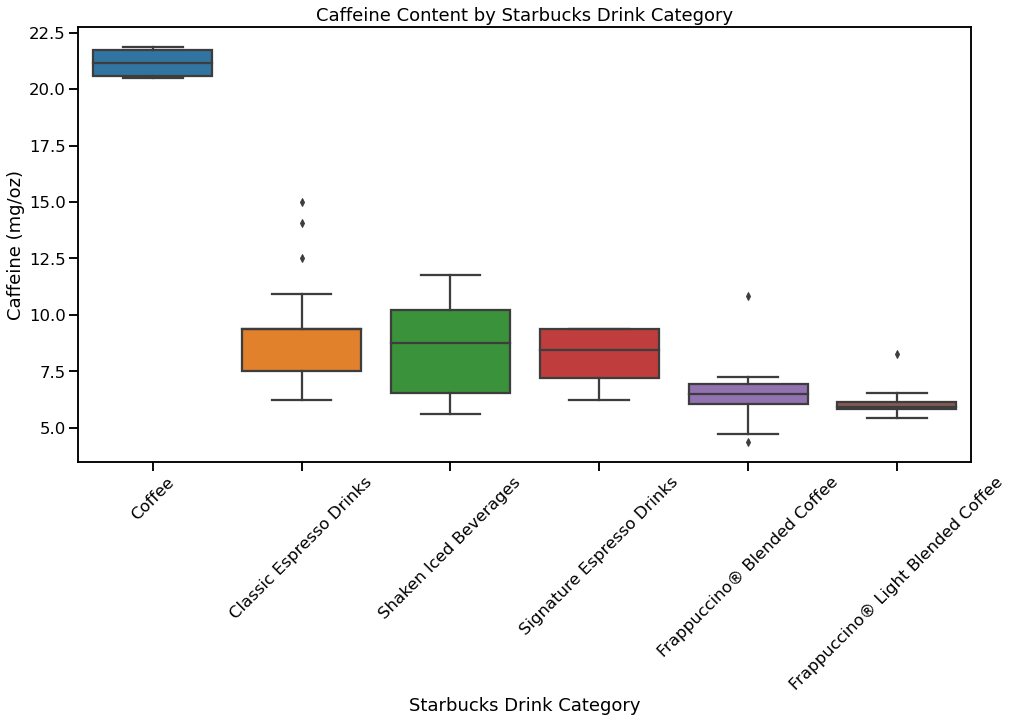

In [166]:
plt.figure(figsize=(16, 8))
sns.set_context("talk")
sns.boxplot(x='Beverage_category',y='norm_Caffeine(mg)',data=coffee_drinks,order=plt_cat_order_caffeine)
plt.xticks(rotation=45)
plt.xlabel('Starbucks Drink Category')
plt.ylabel('Caffeine (mg/oz)')
plt.title('Caffeine Content by Starbucks Drink Category')

Text(0.5, 1.0, 'Calories by Starbucks Drink Category')

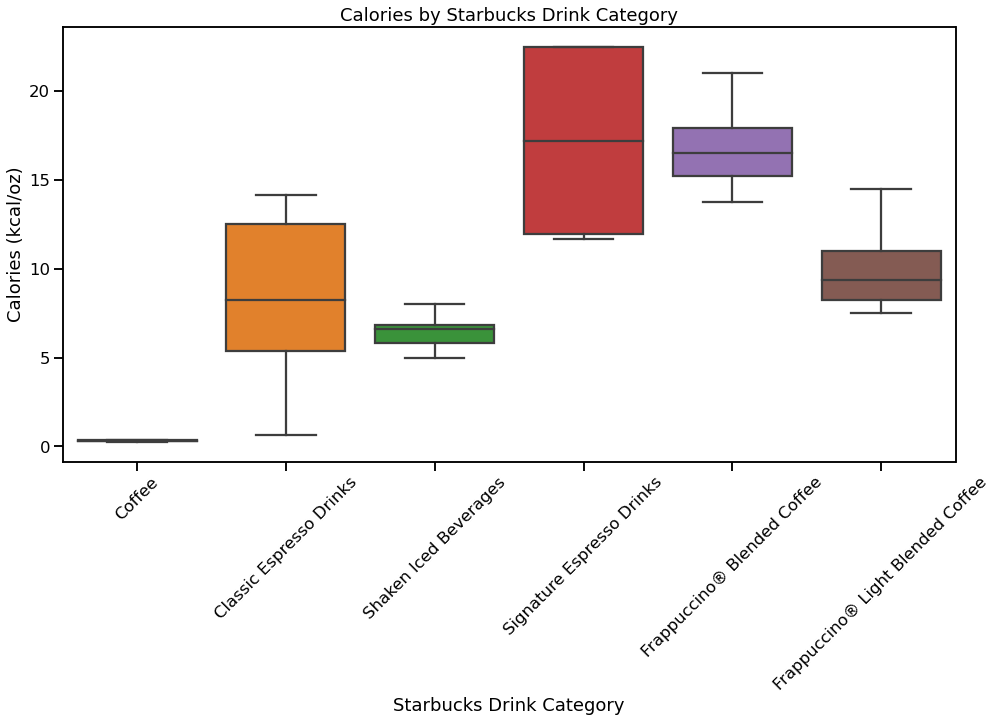

In [170]:
plt.figure(figsize=(16, 8))
sns.set_context("talk")
sns.boxplot(x='Beverage_category',y='norm_Calories',data=coffee_drinks,order=plt_cat_order_caffeine)
plt.xticks(rotation=45)
plt.xlabel('Starbucks Drink Category')
plt.ylabel('Calories (kcal/oz)')
plt.title('Calories by Starbucks Drink Category')

In [191]:
coffee_drinks_calories_caffeine = coffee_drinks.groupby(['Beverage_category'])['norm_Calories','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)
coffee_drinks_calories_caffeine['Caffeine_per_kcal'] = coffee_drinks_calories_caffeine['norm_Caffeine(mg)'] / coffee_drinks_calories_caffeine['norm_Calories']
coffee_drinks_calories_caffeine.reset_index(inplace=True)
coffee_drinks_calories_caffeine

<ipython-input-191-a20ecd6c7589>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  coffee_drinks_calories_caffeine = coffee_drinks.groupby(['Beverage_category'])['norm_Calories','norm_Caffeine(mg)'].mean().sort_values('norm_Caffeine(mg)',ascending=False)


,Beverage_category,norm_Calories,norm_Caffeine(mg),Caffeine_per_kcal
0,Coffee,0.317708,21.166667,66.622951
1,Classic Espresso Drinks,8.171007,9.142361,1.118878
2,Shaken Iced Beverages,6.444444,8.572917,1.330280
3,Signature Espresso Drinks,17.177083,8.125000,0.473014
4,Frappuccino® Blended Coffee,16.837121,6.617424,0.393026
5,Frappuccino® Light Blended Coffee,10.041667,6.144097,0.611860


Text(0.5, 1.0, 'Caffeine (mg) per Calorie by Starbucks Drink Category')

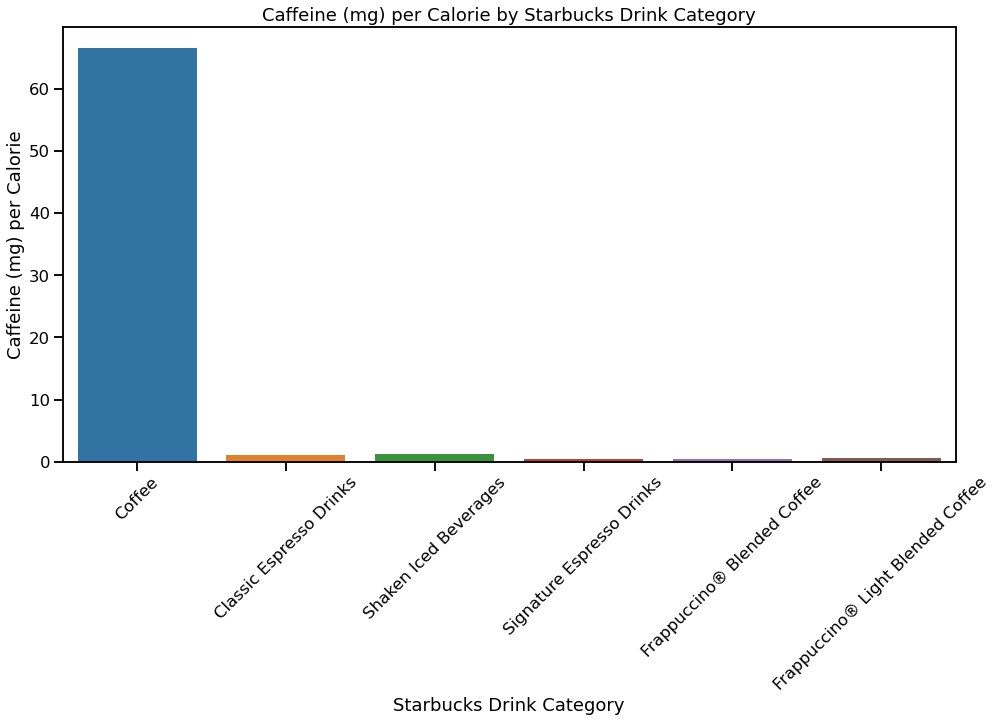

In [190]:
plt.figure(figsize=(16, 8))
sns.set_context("talk")
sns.barplot(x='Beverage_category',y='Caffeine_per_kcal',data=coffee_drinks_calories_caffeine,order=plt_cat_order_caffeine)
plt.xticks(rotation=45)
plt.xlabel('Starbucks Drink Category')
plt.ylabel('Caffeine (mg) per Calorie')
plt.title('Caffeine (mg) per Calorie by Starbucks Drink Category')